/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


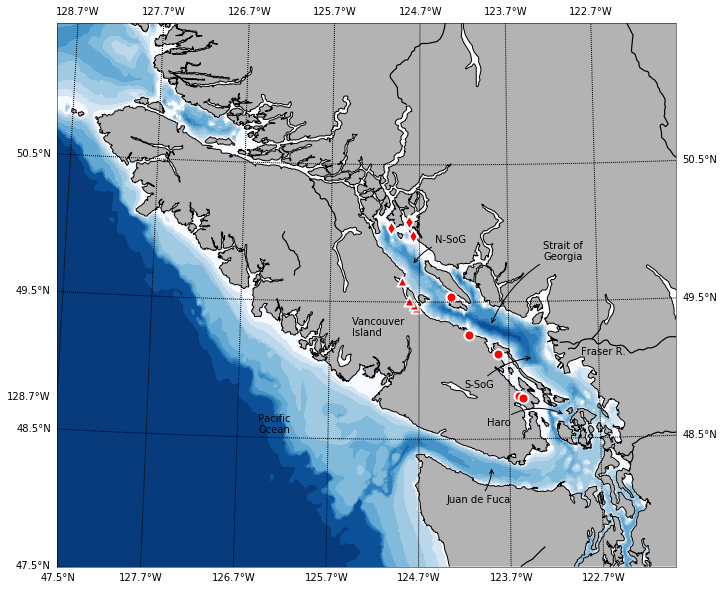

In [1]:
#! /usr/bin/env python
import numpy as np
import numpy.ma as ma
from scipy.interpolate import griddata
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
import os
os.environ['PROJ_LIB'] = r'/anaconda3/pkgs/proj4-5.2.0-h0a44026_1/share/proj'
from mpl_toolkits.basemap import Basemap, shiftgrid

#load station locations
infil = np.loadtxt('Map_v1.txt') #input file

plt.figure(figsize=(20,10))
slat = infil[:,6]
slon = infil[:,7]
ln = infil[:,2]

#model site
modlat = 49.125
modlong = - 123.558

#some masking
mskJ = (ln == 5) #black dots
mskH = (ln == 4) #blue dots
mskS = (ln == 2) #green dots
mskC = (ln == 1.5) #nothing
mskN = (ln == 1) #orange dots

# Define boundaries
latStart = 47.5 #47.5
latEnd = 51.5
lonStart = -128.6
lonEnd = -121.7

#-------------COLORMAP GENERATION ROUTINE------------------ you don't need to understand this part
def LevelColormap(levels, cmap=None):
    """Make a colormap based on an increasing sequence of levels"""
    
    # Start with an existing colormap
    if cmap == None:
        cmap = plt.get_cmap()

    # Spread the colours maximally
    nlev = len(levels)
    S = np.arange(nlev, dtype='float')/(nlev-1)
    A = cmap(S)

    # Normalize the levels to interval [0,1]
    levels = np.array(levels, dtype='float')
    L = (levels-levels[0])/(levels[-1]-levels[0])

    # Make the colour dictionary
    R = [(L[i], A[i,0], A[i,0]) for i in range(nlev)]
    G = [(L[i], A[i,1], A[i,1]) for i in range(nlev)]
    B = [(L[i], A[i,2], A[i,2]) for i in range(nlev)]
    cdict = dict(red=tuple(R),green=tuple(G),blue=tuple(B))

    # Use 
    return LinearSegmentedColormap('%s_levels' % cmap.name, cdict, 256)
#---------------------------------------------------------------

# Get ETOPO1 data
etopo1_fname = 'etopo180_salish.nc' #too be changed with the one Debby is going to send you
etopo1 = Dataset(etopo1_fname,'r')
lon = etopo1.variables["longitude"][:] #variable taken from the file
lat = etopo1.variables["latitude"][:]
bathy = etopo1.variables["altitude"][:]
etopo1.close()

# Define map projection
m = Basemap(llcrnrlon = lonStart, llcrnrlat = latStart, urcrnrlon = lonEnd, 
  urcrnrlat = latEnd, resolution = 'h', projection = 'cass', lon_0=-124.5, 
  lat_0=48.75) #cassini projection (not sure)
m.drawmapboundary(fill_color='white', linewidth=0.5) #boundaries colour

# Draw bathymetry
lon, lat = np.meshgrid(lon, lat) # recast lat and lon as meshgrids
x, y = m(lon, lat) # and convert to x, y coordinates in map projection
levels = [-3000, -1000, -350, -300, -250, -200, -150, -100, -50, -25, -10, -5, 0] # change the different classes here
#levels = [-1000, -400, -350, -300, -250, -150, -125, -100, -50, -25, -10, -5, 0]
m.contourf(x, y, bathy, levels, cmap = LevelColormap(levels, cmap = cm.Blues_r))
#levels = [-150] # define the black line to determine the regions
mpl.rcParams['contour.negative_linestyle'] = 'solid' # drawing line of regions
#c = m.contour(x, y, bathy, levels, colors = 'k', linewidth=0.1) # drawing line of regions #black contour lines
#plt.clabel(c, inline=1, fmt='%d', fontsize=7) # label of the altitude of the line of regions #black contour lines
# - 150 shows the two shallow parts at the north end of the southern gulf islands
# - 200 shows the deep trench in Haro (as does - 150)
# - 120 highlights the Victoria sill nicely

# define some colours (if you need new colours, see website https://flatuicolors.com/ - numbers should between 1 and 0, so divide by 256)
# colours by default are in yellow '', see python documentation
brgree=(0., 1., 0.)
pureblue=(0., 0., 1.)
#harblue=(0.2, 0., 0.7)
#lpurple=(0.9, 0., 0.9)
harblue=(0.9, 0., 0.9)
orange=(0.9, 0.6, 0.)

# Draw coasts, rivers, continents
m.fillcontinents(color=(0.7, 0.7, 0.7), lake_color='white')
m.drawcoastlines()
#m.drawcountries() # if you want the countries, uncomment here
#m.drawrivers() # same for rivers
m.drawrivers(linewidth=1.2) # change the line depth of rivers

# draw parallels and meridians.
m.drawparallels(np.arange(47.5,51.5,1.), labels=[True,True,True,True])
m.drawmeridians(np.arange(-128.7,-121.7,1.), labels=[True,True,True,True])

# plot station locations
# m.scatter(slon, slat, color='w', s=50, latlon=True, zorder=2)
#m.scatter(slon, slat, color='r', latlon=True)

# m.scatter(slon[mskJ], slat[mskJ], color='k', latlon=True, zorder=2) # only plot if ln = 5
# m.scatter(slon[mskH], slat[mskH], s=30, color= '#CB2CD8', latlon=True, zorder=2)
# m.scatter(slon[mskS], slat[mskS], s=30, color= '#B86D26', latlon=True, zorder=2)
# m.scatter(slon[mskN], slat[mskN], s=30, color= '#459C4A', latlon=True, zorder=2)
m.scatter(slon[mskH], slat[mskH], s=100, color= 'k', marker = 'o', edgecolor = 'white', linewidth = 2, latlon=True, zorder=2)
m.scatter(slon[mskS], slat[mskS], s=100, color= 'k', marker = '^', edgecolor = 'white', linewidth = 2, latlon=True, zorder=2)
m.scatter(slon[mskN], slat[mskN], s=100, color= 'k', marker = 'd', edgecolor = 'white', linewidth = 2, latlon=True, zorder=2)

#m.scatter(modlong, modlat, color='k', s=30, latlon=True)
#m.scatter(modlong, modlat, color='w', s=20, latlon=True)


# Normal annotations (Name, location, useless) add whatever you want, \n is space
plt.annotate('Vancouver\nIsland', xy=m(-125.45,49.25), xycoords='data')
#plt.annotate('British\nColumbia', xy=m(-122.70,50.20), xycoords='data')
plt.annotate('Fraser R.', xy=m(-122.90,49.105), xycoords='data')
# plt.annotate('River', xy=m(-122.49,49.04), xycoords='data')
#plt.annotate('Juan\nde\n Fuca', xy=m(-124.40,48.06), xycoords='data')
# plt.annotate('Skagit R.', xy=m(-122.25,48.41), xycoords='data')
plt.annotate('Pacific\nOcean', xy=m(-126.465,48.53), xycoords='data')

# Annotations with lines, add here if you want to add a label with an arrow (Name, location of label, useless, location of end arrow, useless, kind of arrow)
plt.annotate('N-SoG', xy=m(-124.78, 49.77), xycoords='data', xytext=m(-124.52, 49.93), textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
plt.annotate('S-SoG', xy=m(-123.43, 49.09), xycoords='data', xytext=m(-124.20, 48.88), textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'))
plt.annotate('Haro', xy=m(-123.09, 48.67), xycoords='data', xytext=m(-123.95, 48.60), textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.3'))
plt.annotate('Juan de Fuca', xy=m(-123.9,48.3), xycoords='data', xytext=m(-124.40, 48.04), textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
#plt.annotate('Fraser River', xy=m(-123.0,49.26), xycoords='data', xytext=m(-122.40, 49.10), textcoords='data', arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=0.0'))
# plt.annotate('Puget\nSound', xy=m(-122.45,47.84), xycoords='data', xytext=m(-122.13, 47.9), textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
plt.annotate('Strait of\nGeorgia', xy=m(-123.9,49.33), xycoords='data', xytext=m(-123.30, 49.8), textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
             
# show and save plot
# plt.savefig('StudyAreaMap.pdf')
# plt.savefig('StudyAreaMap.jpeg')

plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


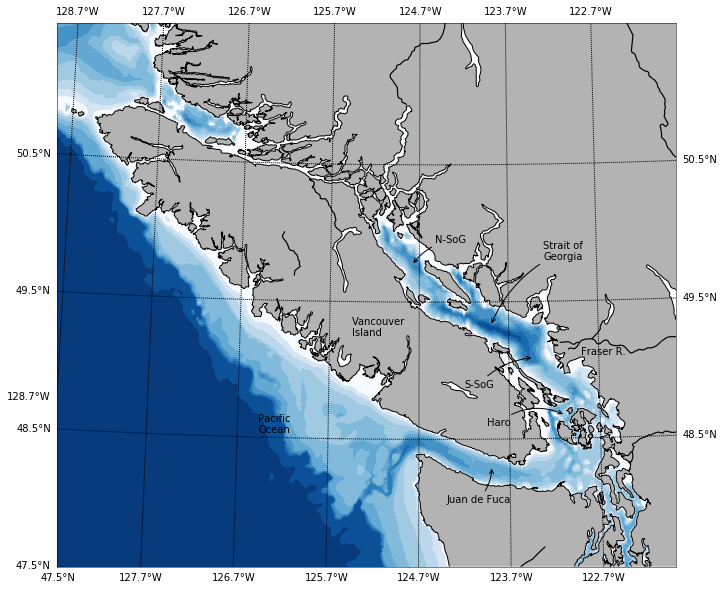

In [10]:
# #! /usr/bin/env python
# import numpy as np
# import numpy.ma as ma
# from scipy.interpolate import griddata
# from netCDF4 import Dataset
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# from matplotlib.colors import LinearSegmentedColormap
# import os
# os.environ['PROJ_LIB'] = r'/anaconda3/pkgs/proj4-5.2.0-h0a44026_1/share/proj'
# from mpl_toolkits.basemap import Basemap, shiftgrid

#load station locations
infil = np.loadtxt('Map_v1.txt') #input file

plt.figure(figsize=(20,10))
slat = infil[:,6]
slon = infil[:,7]
ln = infil[:,2]

#model site
modlat = 49.125
modlong = - 123.558

#some masking
mskJ = (ln == 5) #black dots
mskH = (ln == 4) #blue dots
mskS = (ln == 2) #green dots
mskC = (ln == 1.5) #nothing
mskN = (ln == 1) #orange dots

# Define boundaries
latStart = 47.5 #47.5
latEnd = 51.5
lonStart = -128.6
lonEnd = -121.7

#-------------COLORMAP GENERATION ROUTINE------------------ you don't need to understand this part
def LevelColormap(levels, cmap=None):
    """Make a colormap based on an increasing sequence of levels"""
    
    # Start with an existing colormap
    if cmap == None:
        cmap = plt.get_cmap()

    # Spread the colours maximally
    nlev = len(levels)
    S = np.arange(nlev, dtype='float')/(nlev-1)
    A = cmap(S)

    # Normalize the levels to interval [0,1]
    levels = np.array(levels, dtype='float')
    L = (levels-levels[0])/(levels[-1]-levels[0])

    # Make the colour dictionary
    R = [(L[i], A[i,0], A[i,0]) for i in range(nlev)]
    G = [(L[i], A[i,1], A[i,1]) for i in range(nlev)]
    B = [(L[i], A[i,2], A[i,2]) for i in range(nlev)]
    cdict = dict(red=tuple(R),green=tuple(G),blue=tuple(B))

    # Use 
    return LinearSegmentedColormap('%s_levels' % cmap.name, cdict, 256)
#---------------------------------------------------------------

# Get ETOPO1 data
etopo1_fname = 'etopo180_salish.nc' #too be changed with the one Debby is going to send you
etopo1 = Dataset(etopo1_fname,'r')
lon = etopo1.variables["longitude"][:] #variable taken from the file
lat = etopo1.variables["latitude"][:]
bathy = etopo1.variables["altitude"][:]
etopo1.close()

# Define map projection
m = Basemap(llcrnrlon = lonStart, llcrnrlat = latStart, urcrnrlon = lonEnd, 
  urcrnrlat = latEnd, resolution = 'h', projection = 'cass', lon_0=-124.5, 
  lat_0=48.75) #cassini projection (not sure)
m.drawmapboundary(fill_color='white', linewidth=0.5) #boundaries colour

# Draw bathymetry
lon, lat = np.meshgrid(lon, lat) # recast lat and lon as meshgrids
x, y = m(lon, lat) # and convert to x, y coordinates in map projection
levels = [-3000, -1000, -350, -300, -250, -200, -150, -100, -50, -25, -10, -5, 0] # change the different classes here
#levels = [-1000, -400, -350, -300, -250, -150, -125, -100, -50, -25, -10, -5, 0]
m.contourf(x, y, bathy, levels, cmap = LevelColormap(levels, cmap = cm.Blues_r))
#levels = [-150] # define the black line to determine the regions
mpl.rcParams['contour.negative_linestyle'] = 'solid' # drawing line of regions
#c = m.contour(x, y, bathy, levels, colors = 'k', linewidth=0.1) # drawing line of regions #black contour lines
#plt.clabel(c, inline=1, fmt='%d', fontsize=7) # label of the altitude of the line of regions #black contour lines
# - 150 shows the two shallow parts at the north end of the southern gulf islands
# - 200 shows the deep trench in Haro (as does - 150)
# - 120 highlights the Victoria sill nicely

# define some colours (if you need new colours, see website https://flatuicolors.com/ - numbers should between 1 and 0, so divide by 256)
# colours by default are in yellow '', see python documentation
brgree=(0., 1., 0.)
pureblue=(0., 0., 1.)
#harblue=(0.2, 0., 0.7)
#lpurple=(0.9, 0., 0.9)
harblue=(0.9, 0., 0.9)
orange=(0.9, 0.6, 0.)

# Draw coasts, rivers, continents
m.fillcontinents(color=(0.7, 0.7, 0.7), lake_color='white')
m.drawcoastlines()
#m.drawcountries() # if you want the countries, uncomment here
#m.drawrivers() # same for rivers
m.drawrivers(linewidth=1.2) # change the line depth of rivers

# draw parallels and meridians.
m.drawparallels(np.arange(47.5,51.5,1.), labels=[True,True,True,True])
m.drawmeridians(np.arange(-128.7,-121.7,1.), labels=[True,True,True,True])

# plot station locations
# m.scatter(slon, slat, color='w', s=50, latlon=True, zorder=2)
#m.scatter(slon, slat, color='r', latlon=True)

# m.scatter(slon[mskJ], slat[mskJ], color='k', latlon=True, zorder=2) # only plot if ln = 5
# m.scatter(slon[mskH], slat[mskH], s=30, color= '#CB2CD8', latlon=True, zorder=2)
# m.scatter(slon[mskS], slat[mskS], s=30, color= '#B86D26', latlon=True, zorder=2)
# m.scatter(slon[mskN], slat[mskN], s=30, color= '#459C4A', latlon=True, zorder=2)
# m.scatter(slon[mskH], slat[mskH], s=50, color= 'r', marker = 'o', edgecolor = 'white', linewidth = 1.5, latlon=True, zorder=2)
# m.scatter(slon[mskS], slat[mskS], s=50, color= 'r', marker = 'o', edgecolor = 'white', linewidth = 1.5, latlon=True, zorder=2)
# m.scatter(slon[mskN], slat[mskN], s=50, color= 'r', marker = 'o', edgecolor = 'white', linewidth = 1.5, latlon=True, zorder=2)

#m.scatter(modlong, modlat, color='k', s=30, latlon=True)
#m.scatter(modlong, modlat, color='w', s=20, latlon=True)


# Normal annotations (Name, location, useless) add whatever you want, \n is space
plt.annotate('Vancouver\nIsland', xy=m(-125.45,49.25), xycoords='data')
#plt.annotate('British\nColumbia', xy=m(-122.70,50.20), xycoords='data')
plt.annotate('Fraser R.', xy=m(-122.90,49.105), xycoords='data')
# plt.annotate('River', xy=m(-122.49,49.04), xycoords='data')
#plt.annotate('Juan\nde\n Fuca', xy=m(-124.40,48.06), xycoords='data')
# plt.annotate('Skagit R.', xy=m(-122.25,48.41), xycoords='data')
plt.annotate('Pacific\nOcean', xy=m(-126.465,48.53), xycoords='data')

# Annotations with lines, add here if you want to add a label with an arrow (Name, location of label, useless, location of end arrow, useless, kind of arrow)
plt.annotate('N-SoG', xy=m(-124.78, 49.77), xycoords='data', xytext=m(-124.52, 49.93), textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
plt.annotate('S-SoG', xy=m(-123.43, 49.09), xycoords='data', xytext=m(-124.20, 48.88), textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'))
plt.annotate('Haro', xy=m(-123.09, 48.67), xycoords='data', xytext=m(-123.95, 48.60), textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.3'))
plt.annotate('Juan de Fuca', xy=m(-123.9,48.3), xycoords='data', xytext=m(-124.40, 48.04), textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
#plt.annotate('Fraser River', xy=m(-123.0,49.26), xycoords='data', xytext=m(-122.40, 49.10), textcoords='data', arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=0.0'))
# plt.annotate('Puget\nSound', xy=m(-122.45,47.84), xycoords='data', xytext=m(-122.13, 47.9), textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
plt.annotate('Strait of\nGeorgia', xy=m(-123.9,49.33), xycoords='data', xytext=m(-123.30, 49.8), textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
             
# show and save plot
# plt.savefig('StudyAreaMap.pdf')
# plt.savefig('StudyAreaMap.jpeg')

plt.show()